## Using Twitter with NLTK

*First you need to create a __developer account__ with Twitter by signing in to your twitter account on the [twitter apps page](https://apps.twitter.com). Click on __'Create new app'__ and fill in the details. Once your app has been created go to the tab labeled 'Keys and Access Tokens' and copy the following four items: Consumer Key, Consumer Secret, Access Token, Access Token Secret. Then [follow the instructions here](http://www.nltk.org/howto/twitter.html#Storing-your-keys) for storing your keys in a way that's secure and accessible to python. On a Windows system you need to create an environment variable called __TWITTER__ that contains the path to a file called __credentials.txt__ containing your twitter keys and tokens. Once you've done completed these steps you'll be able to use NLTK's Twitter class without specifying this information.*

*This tutorial uses several modules not included in Anaconda: twython and wordcloud. You can find [instructions for installing twython here](http://www.nltk.org/howto/twitter.html#Install-Twython), and for wordcloud the [installation instructions are here](https://github.com/amueller/word_cloud). The tutorial is based on [this overview of the use of NLTK with Twitter](http://www.nltk.org/howto/twitter.html).*

*To search or stream from Twitter you first need to import the Twitter module from NLTK*

In [ ]:

from nltk.twitter import Query, Streamer, Twitter, TweetViewer, TweetWriter, credsfromfile


*__credsfromfile()__ loads the personal tokens and keys using the TWITTER environment variable that you defined above. Once this is defined you can sample the twitter live stream.*

In [2]:
oauth = credsfromfile(creds_file="credentials.txt", subdir="twitter-files")

In [3]:
client = Streamer(**oauth)
client.register(TweetViewer(limit=10))
client.sample()

RT @torathura: 陸上競技でどっちが
しんどい？
400m→RT
1500m→いいね
@YS_Lauren_t Lol Dey Look Better Den Dat 1... Dat Lil Yorkie Dog Y'all Like Look Better Den Dat
Mclaren é um dos carros mais lindos
@Abrar14ab @asas566o لبى تفاصيل الوجع في وضوحك
طهور يـ اعذب من شكى لي ولا باس

ياحلو احاسيسك ، وياحلو بوحك
واللي خلقني كلك إحساس فِـ إحساس
RT @iamm_du: @martinslenee Te amo 💓
@2aiix اعشقج❤️❤️🙄.
RT @sherlockaf1: In honor of the new ‘The Incredibles 2’ trailer, 
here’s the most iconic scene from the first one.
A true milestone… 
RT @ersintopac51: @mahirunal  https://t.co/e4gjKhzK7E
@doraemonnokodom ＼残念！ハズレです…😭／
ご応募ありがとうございました！
また挑戦してくださいね♪

バンホーテンココア
明治白のひととき
明治ロカボーノ
をこれからもよろしくお願いします！

※未フォローの方は… https://t.co/LBF5P5yD29
서울랜드 멀어서 안대안대,,,
Written 10 Tweets


*You can also add __keywords__ to filter the results*

In [4]:
client = Streamer(**oauth)
client.register(TweetViewer(limit=10))
client.filter(track='sad, happy')

RT @Eyolo: A very happy birthday to my best friend and overall amazing person, @liviwatka https://t.co/Mi0WD3snzg
RT @BieberSideBR: Happy birthday @jaxonbieber https://t.co/cCPGTkWPoU
#officialDreamers n AKO sa Wakas...!!!!!!! G i luv u...happy super… https://t.co/D8LF0cacnv
2017-11-20 23:12
HAPPY HOUR
WEEZER
https://t.co/JA552LyGWx
#interfmplay
RT @ohluhana: My biggest "What If" in life is "What if that TOP x Beenzino collab pushed through..." I would have literally passe… 
@melissamcgurn_ big happy bday to my bestfriend💓💓 hope your day is as special as you, love you sm xxx https://t.co/S7ZdDsZIRR
Happy birthday to the Good man the lover of humanity, the one and only man who has traded his… https://t.co/Dmxg6uHBhq
if lavar ball ether the donald on CNN i can die a happy man
🎶 Lately, I’m just happy to be alive with ‘So Much Trouble In The World’ #bobmarley   #love… https://t.co/qULjKGYhlq
RT @baejuhyeoned: GUESS WHO'S A HAPPY SHIPPER TONIGHT https://t.co/CqAcUb9I1g
Written 10 Tweets


*You can search the stream of selected twitter __users__*

In [5]:
client = Query(**oauth)
client.register(TweetViewer(limit=10))
client.user_tweets('GeorgeMonbiot', 10)

@AdamRamsay what does that mean?
There is a difference between doing your country down and recognising that it has been done down. https://t.co/rse0faiYbH
We live by proxy, employing other people to remain active on our behalf. We watch people on TV jumping up and down… https://t.co/jGANvkv7wP
Interesting, as ever, by @MilesKing10: https://t.co/GU9Vf5knay
@KoniniSt @JohnQuiggin @TheNBR Thanks. Could I have a link for that?
@NathanJDowns A question I asked repeatedly. They refused to answer
BBC news values: 
Extreme scepticism towards stories that challenge the status quo.
Naive receptivity to stories th… https://t.co/bfYgFijr2t


In [6]:
client = Query(**oauth)
tweets = client.search_tweets(keywords='nltk', limit=10)
tweet = next(tweets)
from pprint import pprint
pprint(tweet, depth=1)

{'contributors': None,
 'coordinates': {...},
 'created_at': 'Mon Nov 20 13:42:07 +0000 2017',
 'entities': {...},
 'favorite_count': 0,
 'favorited': False,
 'geo': {...},
 'id': 932604975116566528,
 'id_str': '932604975116566528',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {...},
 'place': {...},
 'retweet_count': 1,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" '
           'rel="nofollow">Twitter for Android</a>',
 'text': 'The latest #NLTK version is 3.2.5. To check your version, print '
         'nltk.__version__ after importing nltk. If you do no… '
         'https://t.co/0L4BhtbIKe',
 'truncated': True,
 'user': {...}}


*And you can search the Twitter stream for keywords using the __Query class__*

In [7]:
client = Query(**oauth)
tweets = client.search_tweets(keywords='donald trump', limit=10)
tweet = next(tweets)

for tweet in tweets:
    print(tweet['created_at'])

Mon Nov 20 14:11:59 +0000 2017
Mon Nov 20 14:11:58 +0000 2017
Mon Nov 20 14:11:58 +0000 2017
Mon Nov 20 14:11:57 +0000 2017
Mon Nov 20 14:11:57 +0000 2017
Mon Nov 20 14:11:56 +0000 2017
Mon Nov 20 14:11:56 +0000 2017
Mon Nov 20 14:11:56 +0000 2017
Mon Nov 20 14:11:55 +0000 2017


*It's also possible to __extract specific metadata__ from the tweets; a complete reference for the JSON tweet structure is [available here](https://dev.twitter.com/overview/api/tweets). IN the example below we do a search for Hillary Clinton and extract the __location and text__ of each tweet. This information is stored in the list variables __lat__ and __lon__, and the string __myText__.*

In [8]:
client = Query(**oauth)
tweets = client.search_tweets(keywords='hillary clinton', limit=1000)
tweet = next(tweets)
lat = []
lon = []
myTweets = ""
for tweet in tweets:
    text = tweet['text']
    myTweets += ' ' + text
    coords = tweet["coordinates"]
    if (coords is not None):
        print(coords['coordinates'][0])
        print(coords['coordinates'][1])
        lat.append(coords['coordinates'][0])
        lon.append(coords['coordinates'][1])
        
        

In [9]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

*You can produce a map of tweet locations using Basemap or Bokeh*

In [10]:
fig = plt.figure(figsize=(20, 14))
markersize = 400
markertype = '.'
markercolor = 'red'
markeralpha = 1

m = Basemap(projection='moll',lat_0=lat[0],lon_0=lon[0],resolution='l')
m.drawcoastlines(linewidth=0.25)

# Convert locations to x/y coordinates and plot them as dots.
x, y = m(lat, lon)
m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)
plt.show()

IndexError: list index out of range

In [11]:
import nltk

def graph(myFile):
  tokens = nltk.tokenize.word_tokenize(myFile)
  fd = nltk.FreqDist(tokens)
  fd.plot(30,cumulative=False)

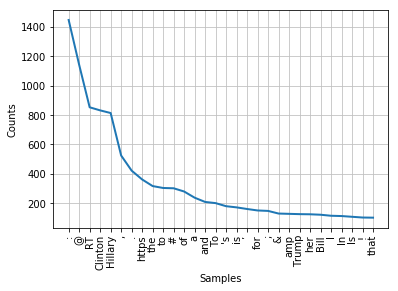

In [12]:
graph(myTweets)

In [13]:
print myTweets

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(myTweets)? (<ipython-input-13-b3ecf98d99d7>, line 1)

In [14]:
from os import path
from wordcloud import WordCloud, STOPWORDS

# define stopwords: these will be excluded from the wordcloud
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("RT")

# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)
wc.generate(myTweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")

ModuleNotFoundError: No module named 'wordcloud'

In [15]:
print stopwords

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(stopwords)? (<ipython-input-15-c160e9277a9d>, line 1)